In [1]:
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
data=pd.read_csv('E:/python/amazon_alexa.tsv',sep='\t')


In [3]:
data.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
data[data.feedback==0].head(30)

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
187,2,29-Jul-18,Charcoal Fabric,Really disappointed Alexa has to be plug-in to...,0
205,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0
233,2,29-Jul-18,Sandstone Fabric,I am not super impressed with Alexa. When my P...,0
299,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out ...,0
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0


In [6]:
print(data.isnull().sum())

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [7]:
 df = pd.DataFrame(data)
#making it a dataframe

In [8]:
df.groupby('feedback').describe()

rating                                             
           count      mean       std  min  25%  50%  75%  max
feedback                                                     
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0

In [9]:
#change text lower cases and removal of white spaces
X = df['verified_reviews']
Y = df['feedback']

In [10]:
lower_text = []
for i in range(0,len(X)):
    s = str(X[i])
    s1 = s.strip()
    lower_text.append(s1.lower())
print('After converting text to lower case\n\n',lower_text)



After converting text to lower case

 ['love my echo!', 'loved it!', 'sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home.', 'i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.', 'music', 'i received the echo as a gift. i needed another bluetooth or something to play music easily accessible, and found this smart speaker. can’t wait to see what else it can do.', 'without having a cellphone, i cannot use many of her features. i have an ipad but do not see that of any use.  it is a great alarm.  if u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.it is fun to ask random questions to hear her response.  she does not seem to be very smartbon politics yet.', "i

In [11]:
#Remove punctuation


In [12]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    phrase = re.sub(r"didn\t", " not", phrase)
    phrase = re.sub(r"\re", " are", phrase)
    phrase = re.sub(r"\ve", " have", phrase)
    phrase = re.sub('[^A-Za-z]+', ' ', phrase)

    return phrase

s4 = []
for i in range(0,len(lower_text)):
    s2 = lower_text[i]
    s3 = s2.strip()
    ss = decontracted(s3)
    s4.append(ss)
    
print('After correcting decontractions\n\n',s4)
   

After correcting decontractions

 ['love my echo ', 'loved it ', 'sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home ', 'i have had a lot of fun with this thing my yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well ', 'music', 'i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can t wait to see what else it can do ', 'without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use it is a great alarm if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep her it is fun to ask random questions to hear her response she does not seem to be very smartbon politics yet ', 'i think this is the th one

In [13]:
punc_text = []
for i in range(0,len(s4)):
    test_str = (s4[i])
    res = re.sub(r'[^\w\s]', '', test_str)
    punc_text.append(res)
print('After removed punctuation\n\n',punc_text)

After removed punctuation

 ['love my echo ', 'loved it ', 'sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home ', 'i have had a lot of fun with this thing my yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well ', 'music', 'i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can t wait to see what else it can do ', 'without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use it is a great alarm if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep her it is fun to ask random questions to hear her response she does not seem to be very smartbon politics yet ', 'i think this is the th one i hav

In [14]:
import nltk
from nltk.corpus import stopwords
my_stop_words = set(stopwords.words('english'))


In [15]:
#Word vector conversion
#Initialize the TF-IDF vectorizer


In [16]:
tfidf = TfidfVectorizer(sublinear_tf=True,norm="l2",ngram_range=(1,2),stop_words=my_stop_words)

In [17]:
X_tfidf = tfidf.fit_transform(punc_text)
print('After vectorized text data\n\n',X_tfidf)

After vectorized text data

   (0, 13109)	0.7770319499075747
  (0, 6452)	0.47354435902041836
  (0, 13062)	0.41470120431796836
  (1, 13283)	1.0
  (2, 1967)	0.19772282939455524
  (2, 12199)	0.2051396989348933
  (2, 23212)	0.1515286188284543
  (2, 70)	0.2051396989348933
  (2, 12261)	0.1716422609223439
  (2, 1412)	0.21559318943003491
  (2, 25735)	0.21559318943003491
  (2, 9497)	0.21559318943003491
  (2, 18978)	0.21559318943003491
  (2, 754)	0.21559318943003491
  (2, 4657)	0.21559318943003491
  (2, 17544)	0.21559318943003491
  (2, 1389)	0.19196985843338202
  (2, 8698)	0.21559318943003491
  (2, 16430)	0.21559318943003491
  (2, 20506)	0.21559318943003491
  (2, 10260)	0.09943860325272631
  (2, 1960)	0.14664968003706708
  (2, 12193)	0.11716691620819901
  (2, 23190)	0.12114114884664344
  (2, 29)	0.11372427930630535
  :	:
  (3148, 10388)	0.11597391169042158
  (3148, 6025)	0.11549361237086804
  (3148, 8516)	0.10048840334239252
  (3148, 8488)	0.11940362613482716
  (3148, 20691)	0.08508139254097181


In [40]:
print(tfidf.vocabulary_)

{'love': 13062, 'echo': 6452, 'love echo': 13109, 'loved': 13283, 'sometimes': 20485, 'playing': 16423, 'game': 8697, 'answer': 1375, 'question': 17540, 'correctly': 4656, 'alexa': 576, 'says': 18969, 'got': 9418, 'wrong': 25732, 'answers': 1405, 'like': 12259, 'able': 29, 'turn': 23190, 'lights': 12193, 'away': 1960, 'home': 10260, 'sometimes playing': 20506, 'playing game': 16430, 'game answer': 8698, 'answer question': 1389, 'question correctly': 17544, 'correctly alexa': 4657, 'alexa says': 754, 'says got': 18978, 'got wrong': 9497, 'wrong answers': 25735, 'answers like': 1412, 'like able': 12261, 'able turn': 70, 'turn lights': 23212, 'lights away': 12199, 'away home': 1967, 'lot': 12978, 'fun': 8544, 'thing': 22276, 'yr': 25882, 'old': 15232, 'learns': 12013, 'dinosaurs': 5750, 'control': 4478, 'play': 16349, 'games': 8700, 'categories': 3501, 'nice': 14901, 'sound': 20636, 'music': 14247, 'well': 24877, 'lot fun': 12993, 'fun thing': 8598, 'thing yr': 22352, 'yr old': 25883, 'ol

In [19]:
print(tfidf.get_feature_names())

['abay', 'abay monitor', 'abc', 'abc days', 'abd', 'abd start', 'abilities', 'abilities alexa', 'abilities day', 'abilities got', 'ability', 'ability adjust', 'ability alexa', 'ability contact', 'ability control', 'ability create', 'ability example', 'ability fall', 'ability listen', 'ability make', 'ability multiple', 'ability music', 'ability night', 'ability play', 'ability respond', 'ability see', 'ability shopping', 'ability talk', 'ability watch', 'able', 'able access', 'able accomplish', 'able add', 'able alexa', 'able answer', 'able buy', 'able call', 'able completely', 'able connect', 'able contact', 'able control', 'able download', 'able downloaded', 'able easily', 'able explore', 'able find', 'able follow', 'able get', 'able hear', 'able hook', 'able idea', 'able install', 'able interpret', 'able link', 'able listen', 'able make', 'able manage', 'able name', 'able open', 'able play', 'able put', 'able read', 'able see', 'able self', 'able set', 'able shout', 'able start', 'a

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y, test_size = 0.20, random_state = 1)

In [21]:
#Print training data
print('Training data\n\n',X_train,'\n',y_train)
print('\n\n')

#Print testing data
print('Testing data\n\n',X_test)
print('\n\n')


Training data

   (0, 9337)	0.49146305684827835
  (0, 17497)	0.4224377322747919
  (0, 20691)	0.3126529252196617
  (0, 9730)	0.3406815207358022
  (0, 17468)	0.47186679538652077
  (0, 9264)	0.24429587959370613
  (0, 9560)	0.17697966479117883
  (0, 20636)	0.22920323898278908
  (1, 750)	0.6822342733705182
  (1, 18650)	0.6822342733705182
  (1, 576)	0.26289311987422215
  (2, 3794)	0.781190436147657
  (2, 3779)	0.5551267869087155
  (2, 14247)	0.28561469312316345
  (3, 24663)	0.25605904002139157
  (3, 2711)	0.25605904002139157
  (3, 10016)	0.25605904002139157
  (3, 19503)	0.25605904002139157
  (3, 16538)	0.25605904002139157
  (3, 18949)	0.25605904002139157
  (3, 21703)	0.25605904002139157
  (3, 10015)	0.25605904002139157
  (3, 23326)	0.2436434774141722
  (3, 23529)	0.2436434774141722
  (3, 2502)	0.23483449555586916
  :	:
  (2514, 16928)	0.15814165608577513
  (2514, 5027)	0.14172065166827935
  (2514, 16923)	0.13960708530435922
  (2514, 8897)	0.21348677011241912
  (2514, 11694)	0.270453239971121

In [22]:
X_test.shape

(630, 25903)

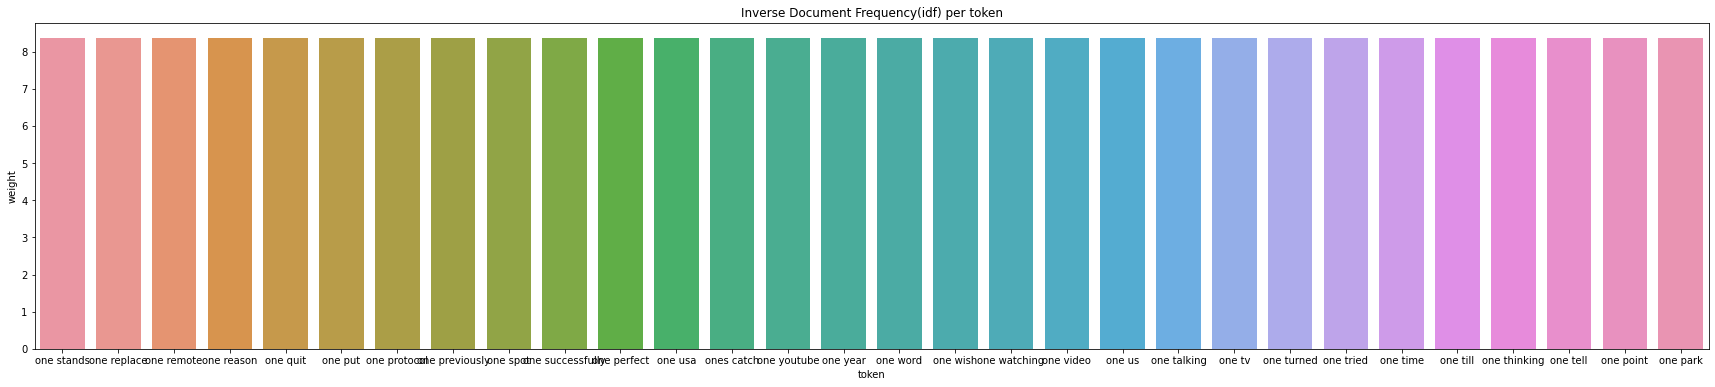

In [23]:
rr = dict(zip(tfidf.fit(punc_text).get_feature_names(), tfidf.idf_))
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)

# showing only top 20 tokens

token_weight = token_weight[10:40]
sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(30,6)
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [25]:
y_pred=classifier.predict(X_test)

In [26]:
#USING SVM LINEAR CLASSIFIER
#The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide,
#returning a "best fit" hyperplane that divides,
#or categorizes, your data. you can then feed some features to your classifier to see what the "predicted" class is.

In [27]:
clf=LinearSVC().fit(X_train, y_train)
    #Fit train and test into the model

In [28]:
#Predict the result
y__pred = clf.predict(X_test)

In [29]:
print('Confusion Matrix\n',confusion_matrix(y_test,y__pred))
print('\n')
print('Classification Report\n',classification_report(y_test,y__pred))
print('\n')
print('Accuracy : ',accuracy_score(y_test,y__pred))

Confusion Matrix
 [[ 14  32]
 [  0 584]]


Classification Report
               precision    recall  f1-score   support

           0       1.00      0.30      0.47        46
           1       0.95      1.00      0.97       584

    accuracy                           0.95       630
   macro avg       0.97      0.65      0.72       630
weighted avg       0.95      0.95      0.94       630



Accuracy :  0.9492063492063492


In [30]:
import numpy as np
import re
import bs4


In [31]:
def clean_text(sentance):
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    return sentance.strip()

In [32]:
def predict(string):
    
    review_text= decontracted(string)
    review_text = clean_text(string)
    print('Preprocessed text\t\n',review_text.lower())

    test_vect = tfidf.transform(([review_text]))
    pred = clf.predict(test_vect)
    #print('After vectorized text data\t\n',test_vect)
    print(pred[0],"\n")
    if (pred[0]==1):
        prediction = "Positive"
    else:
        prediction = "Negative"
    return prediction

In [33]:
predict("It's like Siri, in fact, Siri danswers more accurately")

Preprocessed text	
 it is like siri in fact siri danswers more accurately
0 



'Negative'

In [34]:
predict("Does not work as thought ")

Preprocessed text	
 does not work as thought
0 



'Negative'

In [35]:
predict("Sometimes while playing a game, you can answer..")

Preprocessed text	
 sometimes while playing a game you can answer
1 



'Positive'

In [36]:
predict("I love it wife hates it")

Preprocessed text	
 i love it wife hates it
1 



'Positive'

In [37]:
predict("i sent it to my 85 year old dad and he talks to it constantly")

Preprocessed text	
 i sent it to my year old dad and he talks to it constantly
1 



'Positive'

In [38]:
predict("Item no longer works after just 5 months of us...")

Preprocessed text	
 item no longer works after just months of us
0 



'Negative'

In [39]:
predict("Very cheap")

Preprocessed text	
 very cheap
0 



'Negative'